## Notebook for general data visualization

#### Author: Kuan-Lin Chen, PhD Student of Schulman Lab

##### Last Updated: 2021.08.21

- Feel free to clip some cells to generate nice, literature-approved plots!

In [8]:
import copy, datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import minmax_scale

%matplotlib inline

In [9]:
plt.rc('font', family = 'serif', size = 13, weight = "bold")
plt.rc('xtick', labelsize = 10)
plt.rc('ytick', labelsize = 10)
plt.rc('axes', linewidth = 2)
plt.rc('lines', linewidth = 3)
plt.rc('figure', figsize = (5, 5), dpi = 80)
plt.rc('legend', fontsize = 13)

cm = plt.cm.get_cmap('tab20')

#### Helper Function - Smoothing data by mean

In [10]:
def smooth_by_mean(target, degree = 7):
    """
    This function smooths data by changing to data point to the mean of its neighbors.

    Note:
    1. The degree can only be odd numbers and can not exceed the data amount of the list inputted.
    2. All point are smoothed except for the first and last number.
    For example, say the degree is 9, then the 5th number would be smoothed with the 9 neighbors including itself, while 1st would be smoothed with 3, 2nd with 5, and so on.

    ** Parameters **
        target *list*
            the target list to be smoothed.
        degree *int*
            the degree to be smoothed, can only be odd numbers.
    ** Return **
        smoothed *list*
            the list of the smoothed data points.
    """

    num = int(float(degree - 1) / 2)
    smoothed = copy.deepcopy(target)
    start_num = int(float(degree + 1) / 2)
    
    for i in range(start_num, len(target) - start_num):
        smoothed[i] = float( sum([target[j] for j in range( i - num, i + num + 1)])) / float(degree)
    
    if degree > 3:
        addition_smooth = [i for i in range(start_num)]
        
        for x in range(1,len(addition_smooth)):
            sub_degree = addition_smooth[x] * 2 + 1
            smoothed[x] = float( sum([target[j] for j in range( x - addition_smooth[x], x + addition_smooth[x] + 1)])) / float(sub_degree)
            smoothed[-x-1] = float( sum([target[j] for j in range( -x -1 -addition_smooth[x], -x + addition_smooth[x])])) / float(sub_degree)
    
    return smoothed

#### Optional (for Schulmanlab Members) - qPCR txt file reader

In [11]:
def data_extracter(data, tag = "stg1ro1_1uMrep", START = False, SMOOTH = False, NORM = False, MAX = False, MIN = False):
    """
    This function extracts the data from the dataframe for plotting.
    Can do data smoothing, data normalizing accordiningly.
 
    ** Parameters **
        tag *string*
            the target to be extracted.
        START *int*
            if starting from a number different from 0, specify it here.
        SMOOTH *int*
            intended degree for smoothing data.
            note that the smoothing degree should always be an odd number.
        NORM *Boolyn*
            if intend to normalize data, specify any number here.
        MAX *int*
            the desired maximun number intended for normalization. default would be maximum raw data value.
        MIN *int*
            the desired minimum number intended for normalization. default would be minimum raw data value.
    ** Return **
        extracted *list*
            the list of the extracted data points.
    """
    
    if START:
        extracted = list(data[tag])[start::]
    else:
        extracted = list(data[tag])
        
    if SMOOTH:
        extracted = smooth_by_mean(extracted, SMOOTH)
        
    if NORM:
        if MAX:
            if MIN:
                pass
            else:
                MIN = min(extracted)
        else:
            if MIN:
                MAX = max(extracted)
            else:
                MAX = max(extracted); MIN = min(extracted)
        extracted = [float(i - MIN) / (MAX - MIN) for i in extracted]
        
    return extracted

## Example I - Scatter Plots

reading ```data.xlsx``` and creates scatter plots

In [12]:
filename = "/Users/kuanlin/OneDrive - Johns Hopkins University/DATA/20201211_dna_doseresponse/data.xlsx"
data1 = pd.read_excel(filename, sheet_name = "data")
data1.columns

Index(['0nm', '20nm', '40nm', '60nm', '70nm', '80nm', '100nm', '150nm',
       '200nm', '500nm'],
      dtype='object')

#### Single Plot

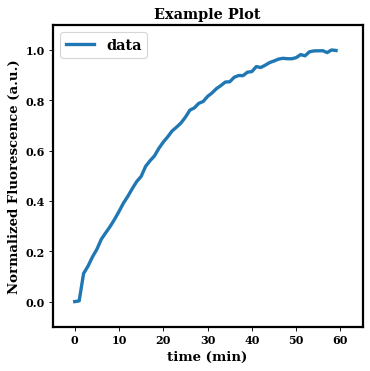

In [27]:
t = 60; timestamp = range(t)
val = minmax_scale(data1['0nm'].values[:t])

fig = plt.figure(figsize = (5, 5), dpi = 80)
ax = plt.subplot(111)

# plot data
plt.plot(timestamp, val, label = "data", color = cm.colors[0], ls = "-")

# Hyper-parameters
plt.ylim(-.1, 1.1); plt.xlim(-5, 65)
plt.xlabel("time (min)", weight = "bold", fontsize = 12)
plt.ylabel("Normalized Fluorescence (a.u.)", weight = "bold", fontsize = 12)
plt.title("Example Plot", weight = "bold", fontsize = 13)
plt.legend()
    
plt.show()

#### Mutiplt Subplots

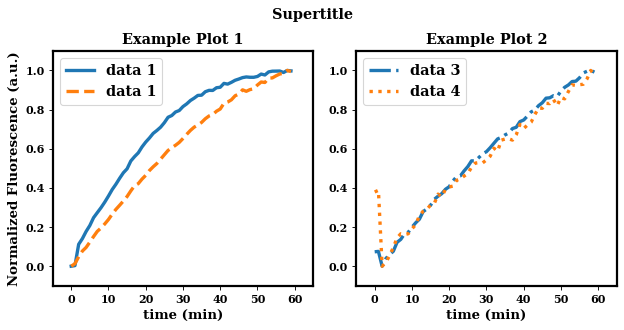

In [41]:
t = 60; timestamp = range(t)

fig = plt.figure(figsize = (8, 4), dpi = 80)

plt.subplot(1, 2, 1)

# plot data
plt.plot(timestamp, minmax_scale(data1['0nm'].values[:t]),\
         label = "data 1", color = cm.colors[0], ls = "-")
plt.plot(timestamp, minmax_scale(data1['20nm'].values[:t]),\
         label = "data 1", color = cm.colors[2], ls = "--")

# Hyper-parameters
plt.ylim(-.1, 1.1); plt.xlim(-5, 65)
plt.xlabel("time (min)", weight = "bold", fontsize = 12)
plt.ylabel("Normalized Fluorescence (a.u.)", weight = "bold", fontsize = 12)
plt.title("Example Plot 1", weight = "bold", fontsize = 13)
plt.legend()

plt.subplot(1, 2, 2)

# plot data
plt.plot(timestamp, minmax_scale(data1['40nm'].values[:t]),\
         label = "data 3", color = cm.colors[0], ls = "-.")
plt.plot(timestamp, minmax_scale(data1['60nm'].values[:t]),\
         label = "data 4", color = cm.colors[2], ls = ":")

# Hyper-parameters
plt.ylim(-.1, 1.1); plt.xlim(-5, 65)
plt.xlabel("time (min)", weight = "bold", fontsize = 12)
# plt.ylabel("Normalized Fluorescence (a.u.)", weight = "bold", fontsize = 12)
plt.title("Example Plot 2", weight = "bold", fontsize = 13)
plt.legend()

plt.tight_layout()

fig.suptitle("Supertitle", weight = "bold", fontsize = 13, y = 1.03)
    
plt.show()

In [42]:
# create your own plots!

# Some Saved Examples
***

### With Annotation

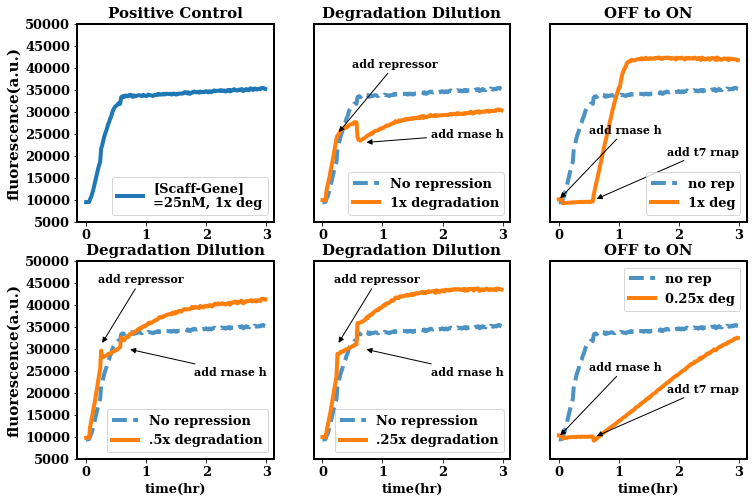

In [53]:
filename = "/Users/kuanlin/OneDrive - Johns Hopkins University/DATA/20201028_m13_2/data.xlsx"
data1 = pd.read_excel(filename, sheet_name = "Sheet1")
print(data1.keys())

fig = plt.figure(figsize = (12, 8))

tf = 180

plt.subplot(2, 3, 1)
val = data1["pos"][:tf]
timestamp = np.array(range(len(val))) / 60
plt.plot(timestamp, val, color = cm.colors[0], lw = 4, label = "[Scaff-Gene]\n=25nM, 1x deg", ls = "-")
plt.title("Positive Control", weight = "bold", fontsize = 15, y = 1, linespacing = 1.5)
# plt.xlabel("time(hr)", weight = "bold", fontsize = 13)
plt.ylabel("fluorescence(a.u.)", weight = "bold", fontsize = 15)
plt.xticks(fontsize = 13, weight = 'bold')
plt.yticks(fontsize = 13, weight = 'bold')
plt.ylim(5000, 50000)
plt.legend(loc=4)

plt.subplot(2, 3, 2)
val = data1["1xDeg"][:tf]
timestamp = np.array(range(len(val))) / 60
plt.plot(timestamp, data1["pos"][:tf], color = cm.colors[0], lw = 4, label = "No repression", ls = "--", alpha = .8)
plt.plot(timestamp, val, color = cm.colors[2], lw = 4, label = "1x degradation", ls = "-")
plt.title("Degradation Dilution", weight = "bold", fontsize = 15, y = 1, linespacing = 1.5)
# plt.xlabel("time(hr)", weight = "bold", fontsize = 13)
# plt.ylabel("fluorescence(a.u.)", weight = "bold", fontsize = 15)
plt.xticks(fontsize = 13, weight = 'bold')
plt.yticks([], fontsize = 13, weight = 'bold')
plt.ylim(5000, 50000)
plt.annotate("add repressor", xy = (.25, 25000), xytext = (.5, 40000),\
             arrowprops = dict(arrowstyle="-|>", color = "black"),\
             fontsize = 11, color = "black", family = "serif", weight = "bold")
plt.annotate("add rnase h", xy = (0.7, 23000), xytext = (1.8, 24000),\
             arrowprops = dict(arrowstyle="-|>", color = "black"),\
             fontsize = 11, color = "black", family = "serif", weight = "bold")
plt.legend(loc=4)

plt.subplot(2, 3, 3)
val = data1["1xDR"][:tf]
timestamp = np.array(range(len(val))) / 60
plt.plot(timestamp, data1["pos"][:tf], color = cm.colors[0], lw = 4, label = "no rep", ls = "--", alpha = .8)
plt.plot(timestamp, val, color = cm.colors[2], lw = 4, label = "1x deg", ls = "-")
plt.title("OFF to ON", weight = "bold", fontsize = 15, y = 1, linespacing = 1.5)
# plt.xlabel("time(hr)", weight = "bold", fontsize = 13)
# plt.ylabel("fluorescence(a.u.)", weight = "bold", fontsize = 15)
plt.xticks(fontsize = 13, weight = 'bold')
plt.yticks([], fontsize = 13, weight = 'bold')
plt.ylim(5000, 50000)
plt.annotate("add rnase h", xy = (.0, 10000), xytext = (.5, 25000),\
             arrowprops = dict(arrowstyle="-|>", color = "black"),\
             fontsize = 11, color = "black", family = "serif", weight = "bold")
plt.annotate("add t7 rnap", xy = (.6, 10000), xytext = (1.8, 20000),\
             arrowprops = dict(arrowstyle="-|>", color = "black"),\
             fontsize = 11, color = "black", family = "serif", weight = "bold")
plt.legend(loc=4)

plt.subplot(2, 3, 4)
val = data1["1/2xDeg"][:tf]
timestamp = np.array(range(len(val))) / 60
plt.plot(timestamp, data1["pos"][:tf], color = cm.colors[0], lw = 4, label = "No repression", ls = "--", alpha = .8)
plt.plot(timestamp, val, color = cm.colors[2], lw = 4, label = ".5x degradation", ls = "-")
plt.title("Degradation Dilution", weight = "bold", fontsize = 15, y = 1, linespacing = 1.5)
plt.xlabel("time(hr)", weight = "bold", fontsize = 13)
plt.ylabel("fluorescence(a.u.)", weight = "bold", fontsize = 15)
plt.xticks(fontsize = 13, weight = 'bold')
plt.yticks(fontsize = 13, weight = 'bold')
plt.ylim(5000, 50000)
plt.annotate("add repressor", xy = (.25, 31000), xytext = (.2, 45000),\
             arrowprops = dict(arrowstyle="-|>", color = "black"),\
             fontsize = 11, color = "black", family = "serif", weight = "bold")
plt.annotate("add rnase h", xy = (0.7, 30000), xytext = (1.8, 24000),\
             arrowprops = dict(arrowstyle="-|>", color = "black"),\
             fontsize = 11, color = "black", family = "serif", weight = "bold")
plt.legend()

plt.subplot(2, 3, 5)
val = data1["1/4Deg"][:tf]
timestamp = np.array(range(len(val))) / 60
plt.plot(timestamp, data1["pos"][:tf], color = cm.colors[0], lw = 4, label = "No repression", ls = "--", alpha = .8)
plt.plot(timestamp, val, color = cm.colors[2], lw = 4, label = ".25x degradation", ls = "-")
plt.title("Degradation Dilution", weight = "bold", fontsize = 15, y = 1, linespacing = 1.5)
plt.xlabel("time(hr)", weight = "bold", fontsize = 13)
# plt.ylabel("fluorescence(a.u.)", weight = "bold", fontsize = 15)
plt.xticks(fontsize = 13, weight = 'bold')
plt.yticks([], fontsize = 13, weight = 'bold')
plt.ylim(5000, 50000)
plt.annotate("add repressor", xy = (.25, 31000), xytext = (.2, 45000),\
             arrowprops = dict(arrowstyle="-|>", color = "black"),\
             fontsize = 11, color = "black", family = "serif", weight = "bold")
plt.annotate("add rnase h", xy = (0.7, 30000), xytext = (1.8, 24000),\
             arrowprops = dict(arrowstyle="-|>", color = "black"),\
             fontsize = 11, color = "black", family = "serif", weight = "bold")
plt.legend()

plt.subplot(2, 3, 6)
val = data1["1/4xDR"][:tf]
timestamp = np.array(range(len(val))) / 60
plt.plot(timestamp, data1["pos"][:tf], color = cm.colors[0], lw = 4, label = "no rep", ls = "--", alpha = .8)
plt.plot(timestamp, val, color = cm.colors[2], lw = 4, label = "0.25x deg", ls = "-")
plt.title("OFF to ON", weight = "bold", fontsize = 15, y = 1, linespacing = 1.5)
plt.xlabel("time(hr)", weight = "bold", fontsize = 13)
# plt.ylabel("fluorescence(a.u.)", weight = "bold", fontsize = 15)
plt.xticks(fontsize = 13, weight = 'bold')
plt.yticks([], fontsize = 13, weight = 'bold')
plt.ylim(5000, 50000)
plt.annotate("add rnase h", xy = (.0, 10000), xytext = (.5, 25000),\
             arrowprops = dict(arrowstyle="-|>", color = "black"),\
             fontsize = 11, color = "black", family = "serif", weight = "bold")
plt.annotate("add t7 rnap", xy = (.6, 10000), xytext = (1.8, 20000),\
             arrowprops = dict(arrowstyle="-|>", color = "black"),\
             fontsize = 11, color = "black", family = "serif", weight = "bold")
plt.legend()


# plt.savefig(datetime.datetime.now().strftime("%Y%m%d_%H_%M_%S") + "fig.png", dpi = 900)
plt.show()

### ```.mat``` file loading

/Users/kuanlin/anaconda2/envs/fox/lib/python3.7/site-packages/scipy/io/matlab/mio.py:218: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


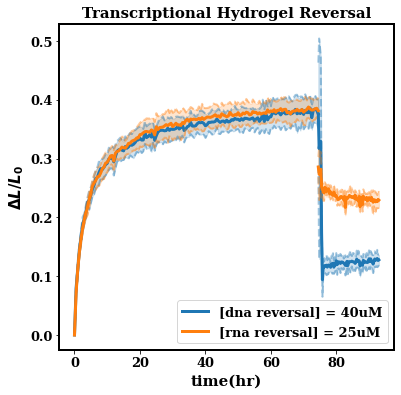

In [141]:
from scipy.io import loadmat

# DNA swell 
filename = "/Users/kuanlin/OneDrive - Johns Hopkins University/DATA/20200820Data/DNA_contract/GlobThAreaCalc_SubImage1_mb1_20200827.mat"
val = np.sqrt(list(map(float, loadmat(filename)['CalibObjAreas']))); norm1 = val[0]
val1 = [(i-val[0])/val[0] for i in val]

filename = "/Users/kuanlin/OneDrive - Johns Hopkins University/DATA/20200820Data/DNA_contract/GlobThAreaCalc_SubImage1_mb2_20200827.mat"
val = np.sqrt(list(map(float, loadmat(filename)['CalibObjAreas']))); norm2 = val[0]
val2 = [(i-val[0])/val[0] for i in val]

filename = "/Users/kuanlin/OneDrive - Johns Hopkins University/DATA/20200820Data/DNA_contract/GlobThAreaCalc_SubImage1_mb3_20200827.mat"
val = np.sqrt(list(map(float, loadmat(filename)['CalibObjAreas']))); norm3 = val[0]
val3 = [(i-val[0])/val[0] for i in val]

# DNA swell 
filename = "/Users/kuanlin/OneDrive - Johns Hopkins University/DATA/20200820Data/RNA_contract/GlobThAreaCalc_SubImage1_mb4_20200827.mat"
val = np.sqrt(list(map(float, loadmat(filename)['CalibObjAreas']))); norm4 = val[0]
val4 = [(i-val[0])/val[0] for i in val]

filename = "/Users/kuanlin/OneDrive - Johns Hopkins University/DATA/20200820Data/RNA_contract/GlobThAreaCalc_SubImage1_mb5_20200827.mat"
val = np.sqrt(list(map(float, loadmat(filename)['CalibObjAreas']))); norm5 = val[0]
val5 = [(i-val[0])/val[0] for i in val]

filename = "/Users/kuanlin/OneDrive - Johns Hopkins University/DATA/20200820Data/RNA_contract/GlobThAreaCalc_SubImage1_mb6_20200827.mat"
val = np.sqrt(list(map(float, loadmat(filename)['CalibObjAreas']))); norm6 = val[0]
val6 = [(i-val[0])/val[0] for i in val]

# DNA Contraction 
filename = "/Users/kuanlin/OneDrive - Johns Hopkins University/DATA/20200826Data/DNA_contract/GlobThAreaCalc_SubImage1_mb1_20200828.mat"
val = np.sqrt(list(map(float, loadmat(filename)['CalibObjAreas'])))
val7 = [(i-norm1)/norm1 for i in val]

filename = "/Users/kuanlin/OneDrive - Johns Hopkins University/DATA/20200826Data/DNA_contract/GlobThAreaCalc_SubImage1_mb2_20200828.mat"
val = np.sqrt(list(map(float, loadmat(filename)['CalibObjAreas'])))
val8 = [(i-norm2)/norm2 for i in val]

filename = "/Users/kuanlin/OneDrive - Johns Hopkins University/DATA/20200826Data/DNA_contract/GlobThAreaCalc_SubImage1_mb3_20200828.mat"
val = np.sqrt(list(map(float, loadmat(filename)['CalibObjAreas'])))
val9 = [(i-norm3)/norm3 for i in val]

# RNA Contraction 
filename = "/Users/kuanlin/OneDrive - Johns Hopkins University/DATA/20200826Data/RNA_contract/GlobThAreaCalc_SubImage1_mb4_20200828.mat"
val = np.sqrt(list(map(float, loadmat(filename)['CalibObjAreas'])))
val10 = [(i-norm4)/norm4 for i in val]

filename = "/Users/kuanlin/OneDrive - Johns Hopkins University/DATA/20200826Data/RNA_contract/GlobThAreaCalc_SubImage1_mb5_20200828.mat"
val = np.sqrt(list(map(float, loadmat(filename)['CalibObjAreas'])))
val11 = [(i-norm5)/norm5 for i in val]

filename = "/Users/kuanlin/OneDrive - Johns Hopkins University/DATA/20200826Data/RNA_contract/GlobThAreaCalc_SubImage1_mb6_20200828.mat"
val = np.sqrt(list(map(float, loadmat(filename)['CalibObjAreas'])))
val12 = [(i-norm6)/norm6 for i in val]

col_num = 0
dat_std = np.array([np.std((val1[i], val2[i], val3[i])) for i in range(len(val1))])
dat_mean = np.array([np.mean((val1[i], val2[i], val3[i])) for i in range(len(val1))])
timestamp = np.array(range(len(dat_std))) / 2
plt.plot(timestamp,dat_mean-dat_std, color = cm.colors[col_num], alpha = .4, ls = "--", lw = 2)
plt.fill_between(timestamp,dat_mean-dat_std, dat_mean, color = cm.colors[col_num], alpha = .2)
plt.plot(timestamp,dat_mean, color = cm.colors[col_num], lw = 3)
plt.plot(timestamp,dat_mean+dat_std, color = cm.colors[col_num], alpha = .4, ls = "--", lw = 2)
plt.fill_between(timestamp,dat_mean, dat_mean+dat_std, color = cm.colors[col_num], alpha = .2)

col_num = 2
dat_std = np.array([np.std((val4[i], val5[i], val6[i])) for i in range(len(val4))])
dat_mean = np.array([np.mean((val4[i], val5[i], val6[i])) for i in range(len(val4))])
timestamp = np.array(range(len(dat_std))) / 2
plt.plot(timestamp,dat_mean-dat_std, color = cm.colors[col_num], alpha = .4, ls = "--", lw = 2)
plt.fill_between(timestamp,dat_mean-dat_std, dat_mean, color = cm.colors[col_num], alpha = .2)
plt.plot(timestamp,dat_mean, color = cm.colors[col_num], lw = 3)
plt.plot(timestamp,dat_mean+dat_std, color = cm.colors[col_num], alpha = .4, ls = "--", lw = 2)
plt.fill_between(timestamp,dat_mean, dat_mean+dat_std, color = cm.colors[col_num], alpha = .2)

col_num = 0; labelname = "[dna reversal] = 40uM"
dat_std = np.array([np.std((val7[i], val8[i], val9[i])) for i in range(len(val7))])
dat_mean = np.array([np.mean((val7[i], val8[i], val9[i])) for i in range(len(val7))])
timestamp2 = np.array(range(len(dat_std))) / 4 + timestamp[-1]
plt.plot(timestamp2,dat_mean-dat_std, color = cm.colors[col_num], alpha = .4, ls = "--", lw = 2)
plt.fill_between(timestamp2,dat_mean-dat_std, dat_mean, color = cm.colors[col_num], alpha = .2)
plt.plot(timestamp2,dat_mean, color = cm.colors[col_num], lw = 3, label = labelname)
plt.plot(timestamp2,dat_mean+dat_std, color = cm.colors[col_num], alpha = .4, ls = "--", lw = 2)
plt.fill_between(timestamp2,dat_mean, dat_mean+dat_std, color = cm.colors[col_num], alpha = .2)

col_num = 2; labelname = "[rna reversal] = 25uM"
dat_std = np.array([np.std((val10[i], val11[i], val12[i])) for i in range(len(val10))])
dat_mean = np.array([np.mean((val10[i], val11[i], val12[i])) for i in range(len(val10))])
timestamp2 = np.array(range(len(dat_std))) / 4 + timestamp[-1]
plt.plot(timestamp2,dat_mean-dat_std, color = cm.colors[col_num], alpha = .4, ls = "--", lw = 2)
plt.fill_between(timestamp2,dat_mean-dat_std, dat_mean, color = cm.colors[col_num], alpha = .2)
plt.plot(timestamp2,dat_mean, color = cm.colors[col_num], lw = 3, label = labelname)
plt.plot(timestamp2,dat_mean+dat_std, color = cm.colors[col_num], alpha = .4, ls = "--", lw = 2)
plt.fill_between(timestamp2,dat_mean, dat_mean+dat_std, color = cm.colors[col_num], alpha = .2)

plt.title("Transcriptional Hydrogel Reversal", weight = "bold", fontsize = 15)
plt.xlabel("time(hr)", weight = "bold", fontsize = 15)
plt.ylabel(r'$\Delta L/L_0$', weight = "bold", fontsize = 15)
plt.xticks(fontsize = 13, weight = 'bold')
plt.yticks(fontsize = 13, weight = 'bold')
plt.legend(loc = 4)

# plt.savefig(datetime.datetime.now().strftime("%Y%m%d_%H_%M_%S") + "fig.png", dpi = 900)
plt.show()